# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
# tf.debugging.set_log_device_placement(True)
tf.test.is_gpu_available()

True

In [7]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [8]:
tf.reset_default_graph()

In [9]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 30
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 5  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/blbudima/miniconda3/envs/sgm/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [10]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 994/30000 [00:19<08:42, 55.54it/s] 

Saved checkpoint for step 1000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.933091
INFO:tensorflow:56.534 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -22.70
INFO:tensorflow:		 predicted_dist = 21.0 (0.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.70
INFO:tensorflow:		 predicted_dist = 20.8 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 21.4 (0.6)
INFO:tensorflow:	 eval_time = 4.99


  7%|▋         | 1999/30000 [00:43<10:57, 42.58it/s]  

Saved checkpoint for step 2000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 2.041975
INFO:tensorflow:63.974 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.20
INFO:tensorflow:		 predicted_dist = 22.8 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -23.30
INFO:tensorflow:		 predicted_dist = 22.9 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 25.1 (1.2)
INFO:tensorflow:	 eval_time = 4.40


 10%|▉         | 2995/30000 [01:05<08:11, 54.99it/s]  

Saved checkpoint for step 3000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 1.846948
INFO:tensorflow:65.057 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -28.20
INFO:tensorflow:		 predicted_dist = 20.6 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -19.40
INFO:tensorflow:		 predicted_dist = 24.5 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 24.8 (2.0)
INFO:tensorflow:	 eval_time = 4.21


 13%|█▎        | 3998/30000 [01:27<07:41, 56.33it/s]  

Saved checkpoint for step 4000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 1.589824
INFO:tensorflow:64.368 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -22.00
INFO:tensorflow:		 predicted_dist = 24.6 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -25.90
INFO:tensorflow:		 predicted_dist = 26.2 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.60
INFO:tensorflow:		 predicted_dist = 27.2 (1.1)
INFO:tensorflow:	 eval_time = 4.15


 17%|█▋        | 4998/30000 [01:48<07:23, 56.39it/s]  

Saved checkpoint for step 5000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 1.609091
INFO:tensorflow:65.618 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.70
INFO:tensorflow:		 predicted_dist = 22.1 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -25.60
INFO:tensorflow:		 predicted_dist = 25.4 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 27.2 (1.0)
INFO:tensorflow:	 eval_time = 3.95


 20%|█▉        | 5995/30000 [02:10<06:59, 57.24it/s]  

Saved checkpoint for step 6000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 1.601400
INFO:tensorflow:65.461 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.50
INFO:tensorflow:		 predicted_dist = 20.1 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -21.00
INFO:tensorflow:		 predicted_dist = 23.3 (3.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 25.2 (1.7)
INFO:tensorflow:	 eval_time = 3.86


 23%|██▎       | 6995/30000 [02:31<06:59, 54.82it/s]  

Saved checkpoint for step 7000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 1.921887
INFO:tensorflow:65.733 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -11.60
INFO:tensorflow:		 predicted_dist = 21.7 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -25.70
INFO:tensorflow:		 predicted_dist = 23.2 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -27.90
INFO:tensorflow:		 predicted_dist = 25.2 (1.5)
INFO:tensorflow:	 eval_time = 3.80


 27%|██▋       | 7997/30000 [02:53<06:15, 58.65it/s]  

Saved checkpoint for step 8000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 2.280597
INFO:tensorflow:65.714 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.30
INFO:tensorflow:		 predicted_dist = 19.0 (2.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -25.30
INFO:tensorflow:		 predicted_dist = 23.0 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -27.00
INFO:tensorflow:		 predicted_dist = 25.9 (1.0)
INFO:tensorflow:	 eval_time = 4.03


 30%|██▉       | 8995/30000 [03:14<06:07, 57.14it/s]  

Saved checkpoint for step 9000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 2.413536
INFO:tensorflow:65.136 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -15.00
INFO:tensorflow:		 predicted_dist = 16.5 (4.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -24.10
INFO:tensorflow:		 predicted_dist = 21.4 (2.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -25.50
INFO:tensorflow:		 predicted_dist = 24.6 (2.0)
INFO:tensorflow:	 eval_time = 3.78


 33%|███▎      | 9998/30000 [03:36<05:50, 57.03it/s]  

Saved checkpoint for step 10000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 2.967748
INFO:tensorflow:63.475 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -11.90
INFO:tensorflow:		 predicted_dist = 16.1 (2.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.10
INFO:tensorflow:		 predicted_dist = 19.5 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -23.10
INFO:tensorflow:		 predicted_dist = 21.3 (1.7)
INFO:tensorflow:	 eval_time = 3.17


 37%|███▋      | 10996/30000 [03:57<05:37, 56.32it/s]  

Saved checkpoint for step 11000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 2.748750
INFO:tensorflow:64.696 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.50
INFO:tensorflow:		 predicted_dist = 14.4 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -15.70
INFO:tensorflow:		 predicted_dist = 16.9 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -25.40
INFO:tensorflow:		 predicted_dist = 20.6 (1.4)
INFO:tensorflow:	 eval_time = 3.05


 40%|███▉      | 11999/30000 [04:18<06:56, 43.24it/s]

Saved checkpoint for step 12000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 3.392866
INFO:tensorflow:64.362 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.10
INFO:tensorflow:		 predicted_dist = 12.5 (3.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.30
INFO:tensorflow:		 predicted_dist = 17.0 (2.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -23.20
INFO:tensorflow:		 predicted_dist = 18.3 (1.2)
INFO:tensorflow:	 eval_time = 2.85


 43%|████▎     | 12999/30000 [04:39<06:52, 41.21it/s]

Saved checkpoint for step 13000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 2.917265
INFO:tensorflow:64.000 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.30
INFO:tensorflow:		 predicted_dist = 13.0 (3.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -19.80
INFO:tensorflow:		 predicted_dist = 15.5 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -22.50
INFO:tensorflow:		 predicted_dist = 19.5 (2.0)
INFO:tensorflow:	 eval_time = 3.07


 47%|████▋     | 13994/30000 [05:00<04:40, 57.02it/s]

Saved checkpoint for step 14000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 2.976534
INFO:tensorflow:64.057 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.00
INFO:tensorflow:		 predicted_dist = 10.0 (3.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.80
INFO:tensorflow:		 predicted_dist = 14.1 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 17.4 (2.0)
INFO:tensorflow:	 eval_time = 2.49


 50%|████▉     | 14998/30000 [05:21<04:32, 54.98it/s]

Saved checkpoint for step 15000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 3.402900
INFO:tensorflow:63.311 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.30
INFO:tensorflow:		 predicted_dist = 9.8 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.30
INFO:tensorflow:		 predicted_dist = 11.9 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 15.3 (1.9)
INFO:tensorflow:	 eval_time = 2.84


 53%|█████▎    | 15996/30000 [05:42<04:02, 57.72it/s]

Saved checkpoint for step 16000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 2.977606
INFO:tensorflow:64.380 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -11.20
INFO:tensorflow:		 predicted_dist = 6.6 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.20
INFO:tensorflow:		 predicted_dist = 10.9 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -23.20
INFO:tensorflow:		 predicted_dist = 14.1 (1.9)
INFO:tensorflow:	 eval_time = 2.84


 57%|█████▋    | 16998/30000 [06:02<03:48, 57.00it/s]

Saved checkpoint for step 17000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 3.093735
INFO:tensorflow:63.714 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.00
INFO:tensorflow:		 predicted_dist = 8.0 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.90
INFO:tensorflow:		 predicted_dist = 11.6 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 13.9 (0.8)
INFO:tensorflow:	 eval_time = 2.48


 60%|█████▉    | 17997/30000 [06:23<03:36, 55.48it/s]

Saved checkpoint for step 18000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 3.072114
INFO:tensorflow:63.928 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.00
INFO:tensorflow:		 predicted_dist = 7.4 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 11.0 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.50
INFO:tensorflow:		 predicted_dist = 14.2 (1.9)
INFO:tensorflow:	 eval_time = 2.34


 63%|██████▎   | 18998/30000 [06:43<03:13, 56.97it/s]

Saved checkpoint for step 19000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 3.208142
INFO:tensorflow:63.692 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 6.5 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.20
INFO:tensorflow:		 predicted_dist = 11.5 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.50
INFO:tensorflow:		 predicted_dist = 15.2 (1.4)
INFO:tensorflow:	 eval_time = 2.20


 67%|██████▋   | 19995/30000 [07:03<02:53, 57.70it/s]

Saved checkpoint for step 20000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 2.672876
INFO:tensorflow:64.498 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 5.1 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.30
INFO:tensorflow:		 predicted_dist = 10.6 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 14.2 (2.1)
INFO:tensorflow:	 eval_time = 2.44


 70%|██████▉   | 20994/30000 [07:24<02:36, 57.53it/s]

Saved checkpoint for step 21000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 3.009752
INFO:tensorflow:64.634 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 7.1 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.80
INFO:tensorflow:		 predicted_dist = 10.9 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.10
INFO:tensorflow:		 predicted_dist = 14.2 (1.3)
INFO:tensorflow:	 eval_time = 2.31


 73%|███████▎  | 21999/30000 [07:44<03:30, 37.99it/s]

Saved checkpoint for step 22000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 3.335251
INFO:tensorflow:63.825 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 7.1 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 11.2 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.60
INFO:tensorflow:		 predicted_dist = 14.1 (2.9)
INFO:tensorflow:	 eval_time = 2.19


 77%|███████▋  | 22998/30000 [08:04<02:03, 56.49it/s]

Saved checkpoint for step 23000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 3.113504
INFO:tensorflow:65.234 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 6.3 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.50
INFO:tensorflow:		 predicted_dist = 9.4 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.50
INFO:tensorflow:		 predicted_dist = 13.7 (1.7)
INFO:tensorflow:	 eval_time = 2.24


 80%|███████▉  | 23995/30000 [08:24<01:45, 56.81it/s]

Saved checkpoint for step 24000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 3.061716
INFO:tensorflow:64.432 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.80
INFO:tensorflow:		 predicted_dist = 6.2 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.90
INFO:tensorflow:		 predicted_dist = 10.0 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.80
INFO:tensorflow:		 predicted_dist = 13.0 (1.4)
INFO:tensorflow:	 eval_time = 2.33


 83%|████████▎ | 24994/30000 [08:44<01:28, 56.31it/s]

Saved checkpoint for step 25000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 3.773386
INFO:tensorflow:64.689 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.60
INFO:tensorflow:		 predicted_dist = 6.0 (3.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 11.8 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 14.4 (1.1)
INFO:tensorflow:	 eval_time = 2.32


 87%|████████▋ | 25997/30000 [09:04<01:09, 57.37it/s]

Saved checkpoint for step 26000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 3.578866
INFO:tensorflow:65.334 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 4.5 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.50
INFO:tensorflow:		 predicted_dist = 10.2 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.10
INFO:tensorflow:		 predicted_dist = 13.4 (2.4)
INFO:tensorflow:	 eval_time = 2.35


 90%|████████▉ | 26995/30000 [09:24<00:53, 56.46it/s]

Saved checkpoint for step 27000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 3.672971
INFO:tensorflow:64.024 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 5.8 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 10.1 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.30
INFO:tensorflow:		 predicted_dist = 12.3 (1.2)
INFO:tensorflow:	 eval_time = 2.23


 93%|█████████▎| 27999/30000 [09:44<00:47, 42.09it/s]

Saved checkpoint for step 28000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 3.459525
INFO:tensorflow:65.343 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 8.2 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.20
INFO:tensorflow:		 predicted_dist = 10.2 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.30
INFO:tensorflow:		 predicted_dist = 12.6 (1.3)
INFO:tensorflow:	 eval_time = 2.21


 97%|█████████▋| 28996/30000 [10:04<00:17, 57.39it/s]

Saved checkpoint for step 29000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 3.303082
INFO:tensorflow:64.937 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 7.2 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 9.5 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.00
INFO:tensorflow:		 predicted_dist = 12.6 (1.3)
INFO:tensorflow:	 eval_time = 2.14


100%|█████████▉| 29995/30000 [10:23<00:00, 56.40it/s]

Saved checkpoint for step 30000: /home/blbudima/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 3.506731
INFO:tensorflow:65.879 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 5.0 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 10.2 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 14.3 (1.6)
INFO:tensorflow:	 eval_time = 2.22


100%|██████████| 30000/30000 [10:26<00:00, 47.90it/s]


LossInfo(loss=<tf.Tensor: id=1149426, shape=(), dtype=float32, numpy=3.5067313>, extra=(<tf.Tensor: id=1149427, shape=(), dtype=float32, numpy=1.0679157>, <tf.Tensor: id=1149428, shape=(), dtype=float32, numpy=2.4388156>))

# Load trained model into agent

In [11]:
filename = "FourRooms_coordinate_30steps-May-13-2021-02-19-17-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [12]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=10)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

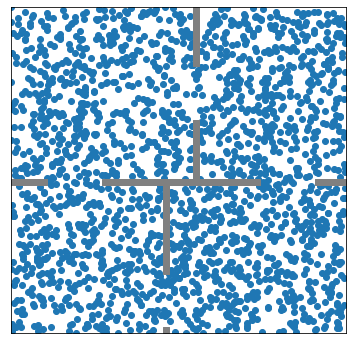

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [14]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

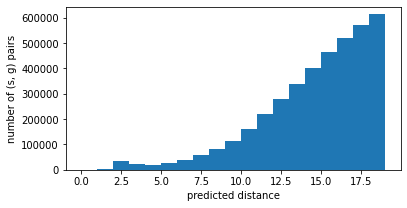

In [15]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 302 nodes and 2231 edges


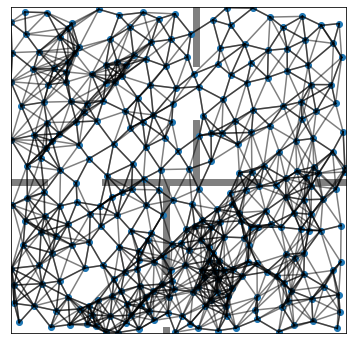

In [16]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 302 nodes and 1457 edges


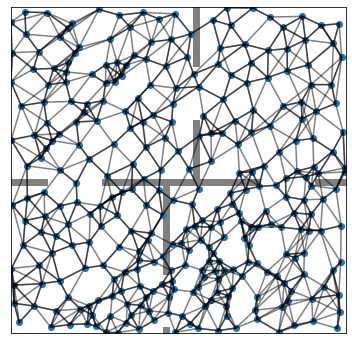

In [17]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 302 nodes and 1187 edges


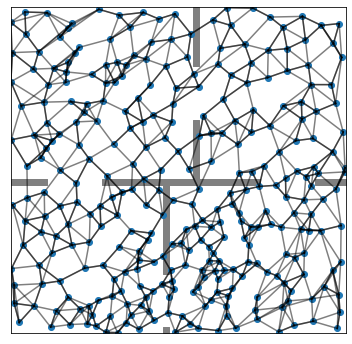

In [18]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 302 nodes and 901 edges


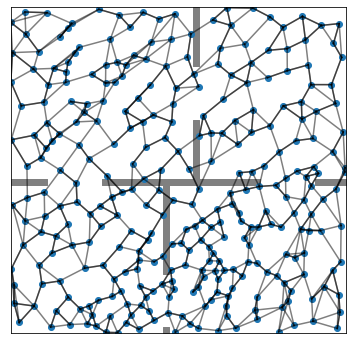

In [19]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 302 nodes and 604 edges


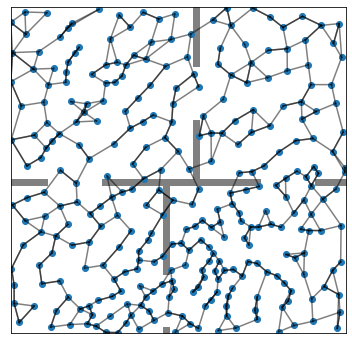

In [20]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 302 nodes and 302 edges


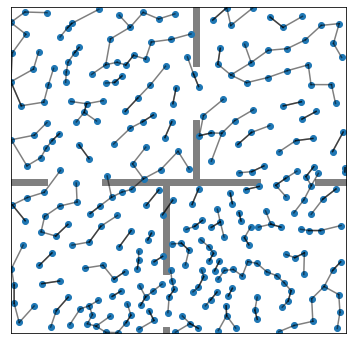

In [21]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

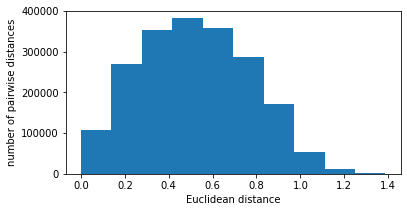

In [22]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [23]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

# Cleanup and evaluate SGM

In [24]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.25
Evaluated initial SGM success rate in 458.52 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.25
Took 5000 cleanup steps and evaluated SGM success rate in 902.93 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.45
Took 5000 cleanup steps and evaluated SGM success rate in 801.44 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.45
Took 5000 cleanup steps and evaluated SGM success rate in 794.36 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.40
Took 5000 cleanup steps and evaluated SGM success rate in 803.99 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.60
Took 5000 cleanup steps and evaluated SGM success rate in 758.91 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.55
Took 5000 cleanup steps and evaluated SGM success rate in 747.33 seconds
After filtering and 30000 cleanup steps, SGM has success rate 0.70
Took 5000 c

# Load cleanup graphs

In [25]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

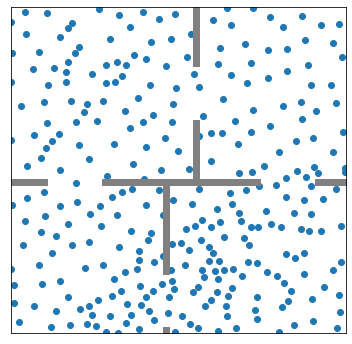

In [26]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 302 nodes and 2231 edges


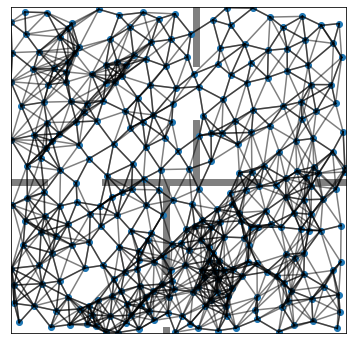

In [27]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 302 nodes and 1457 edges


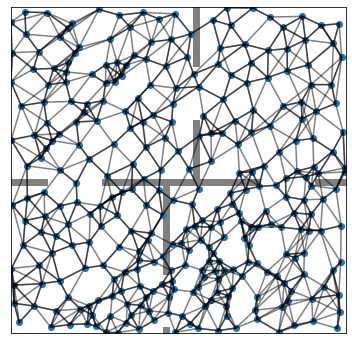

In [28]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 302 nodes and 1397 edges


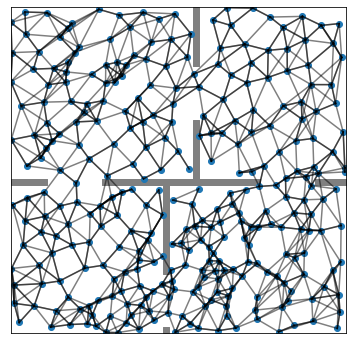

In [29]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 302 nodes and 60 edges


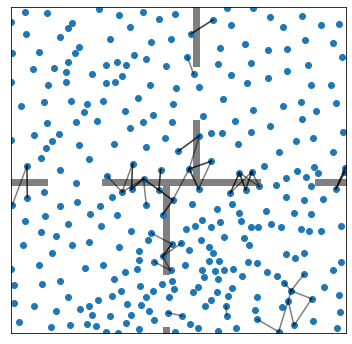

In [30]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)